In [ ]:
from graphviz import Digraph
from IPython.display import Image, display


In [ ]:
def acao(destino, custo):
    return { 'destino': destino, 'custo': custo }

estados_romenia = [
    { 'estado': 'Arad', 'acoes': [acao('Zerind', 75), acao('Sibiu', 140), acao('Timisoara', 118)] },
    { 'estado': 'Zerind', 'acoes': [acao('Arad', 75), acao('Oradea', 71)] },
    { 'estado': 'Timisoara', 'acoes': [acao('Arad', 118), acao('Lugoj', 111)] },
    { 'estado': 'Sibiu', 'acoes': [acao('Arad', 140), acao('Oradea', 151), acao('Fagaras', 99), acao('Rimnicu Vilcea', 80)] },
    { 'estado': 'Oradea', 'acoes': [acao('Zerind', 71), acao('Sibiu', 151)] },
    { 'estado': 'Lugoj', 'acoes': [acao('Timisoara', 111), acao('Mehadia', 70)] },
    { 'estado': 'Mehadia', 'acoes': [acao('Lugoj', 70), acao('Drobeta', 75)] },
    { 'estado': 'Drobeta', 'acoes': [acao('Mehadia', 75), acao('Craiova', 120)] },
    { 'estado': 'Craiova', 'acoes': [acao('Drobeta', 120), acao('Rimnicu Vilcea', 146), acao('Pitesti', 138)] },
    { 'estado': 'Rimnicu Vilcea', 'acoes': [acao('Sibiu', 80), acao('Craiova', 146), acao('Pitesti', 97)] },
    { 'estado': 'Fagaras', 'acoes': [acao('Sibiu', 99), acao('Bucharest', 211)] },
    { 'estado': 'Pitesti', 'acoes': [acao('Rimnicu Vilcea', 97), acao('Craiova', 138), acao('Bucharest', 101)] },
    { 'estado': 'Giurgiu', 'acoes': [acao('Bucharest', 90)] },
    { 'estado': 'Bucharest', 'acoes': [acao('Fagaras', 211), acao('Pitesti', 101), acao('Giurgiu', 90), acao('Urziceni', 85)] },
    { 'estado': 'Urziceni', 'acoes': [acao('Bucharest', 85), acao('Vaslui', 142), acao('Hirsova', 98)] },
    { 'estado': 'Hirsova', 'acoes': [acao('Urziceni', 98), acao('Eforie', 86)] },
    { 'estado': 'Eforie', 'acoes': [acao('Hirsova', 86)] },
    { 'estado': 'Vaslui', 'acoes': [acao('Urziceni', 142), acao('Iasi', 92)] },
    { 'estado': 'Iasi', 'acoes': [acao('Vaslui', 92), acao('Neamt', 87)] },
    { 'estado': 'Neamt', 'acoes': [acao('Iasi', 87)] }
]

heuristica_romenia = {
    "Arad": 366, "Bucharest": 0, "Craiova": 160, "Drobeta": 242, "Eforie": 161,
    "Fagaras": 176, "Giurgiu": 77, "Hirsova": 151, "Iasi": 226, "Lugoj": 244,
    "Mehadia": 241, "Neamt": 234, "Oradea": 380, "Pitesti": 100,
    "Rimnicu Vilcea": 193, "Sibiu": 253, "Timisoara": 329, "Urziceni": 80,
    "Vaslui": 199, "Zerind": 374
}


In [ ]:
#
# Implementa um min-heap
# (uma arvore binaria em que o menor elemento sempre esta na raiz)
#
# Elementos devem ser objetos que sao comparados pela propriedade (variavel) f
#
# Ref.: "Introduction to Algorithms" - Cormen, Leiserson, Rivest & Stein
# 3rd edition, MIT Press, 2009.
#

class MinHeap:
    def __init__(self):
        self.contents = []
        self.capacity = 0
        self.size = 0

    # remove o menor elemento do heap e reestabelece a ordem correta
    def remove_min(self):
        if self.size < 1:
            return None

        # guarda o menor elemento e coloca o ultimo elemento na raiz
        minimo = self.contents[0]
        self.contents[0] = self.contents[self.size-1]
        self.size -= 1

        # reestabelece a propriedade do min-heap
        self.__min_heapify(0)

        return minimo

    def adiciona(self, node):
        indice = self.size
        if self.capacity == self.size:
            self.contents.append(node)
            self.capacity += 1
        self.__insert(indice, node)
        self.size += 1


    # Metodos privados
    def __pai(self, i):
        return (i - 1) // 2

    def __filho_esquerdo(self, i):
        return i * 2 + 1

    def __filho_direito(self, i):
        return i * 2 + 2

    def __swap(self, i, j):
        self.contents[i], self.contents[j] = self.contents[j], self.contents[i]

    def __min_heapify(self, i):
        l = self.__filho_esquerdo(i)
        r = self.__filho_direito(i)

        # encontra qual o menor dos tres nos: i, l ou r
        minimo = i

        if l < self.size and self.contents[i].f > self.contents[l].f:
            minimo = l

        if r < self.size and self.contents[minimo].f > self.contents[r].f:
            minimo = r

        # se i nao for o menor no, troca de lugar com o menor e continua
        # recursivamente
        if minimo != i:
            self.__swap(i, minimo)
            self.__min_heapify(minimo)

    def __insert(self, i, node):
        self.contents[i] = node
        while i > 0 and self.contents[self.__pai(i)].f > self.contents[i].f:
            self.__swap(i, self.__pai(i))
            i = self.__pai(i)


# uma fila de prioridade que retorna os nos de valor minimo primeiro
class PriorityQueue:
    def __init__(self):
        self.heap = MinHeap()

    def remove_min(self):
        return self.heap.remove_min()  # agora retorna o menor nó

    def adiciona(self, node):
        self.heap.adiciona(node)



# Ordena uma lista de numeros usando um heap,
# para testar a implementacao
def heap_sort(numeros):
    heap = MinHeap()

    class NoNumerico:
        def __init__(self, n):
            self.f = n

    for num in numeros:
        heap.adiciona(NoNumerico(num))

    resultado = []
    while heap.size > 0:
        n = heap.remove_min()
        resultado.append(n.f)

    return resultado

In [ ]:
BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2

class No:
    def __init__(self, estado, custo, pai, acao, f=None):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao
        self.f = f if f is not None else custo
        self.id = id(self)

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)
        return [
            No(acao['destino'], self.custo + acao['custo'], self, acao['destino'])
            for acao in espaco_acoes['acoes']
        ]

    def constroi_solucao(self):
        no_atual = self
        solucao = [no_atual]
        while no_atual.pai:
            no_atual = no_atual.pai
            solucao.insert(0, no_atual)
        return solucao

class Problema:
    def __init__(self, espaco_estados, inicial, objetivo):
        self.espaco_estados = espaco_estados
        self.inicial = inicial
        self.objetivo = objetivo



Questão 1

In [ ]:
class BuscaAEstrela:
    def __init__(self, problema, heuristica):
        self.problema = problema
        self.heuristica = heuristica
        self.fronteira = PriorityQueue()
        problema.inicial.f = problema.inicial.custo + heuristica[problema.inicial.estado]
        self.fronteira.adiciona(problema.inicial)
        self.visitados = set()
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        passo = 0
        while self.situacao not in [BUSCA_SUCESSO, BUSCA_FALHOU]:
            print(f"\n🔁 Passo {passo}")
            self.passo_busca()
            passo += 1

        if self.situacao == BUSCA_SUCESSO:
            print("\n✅ Solução encontrada!")
            for no in self.solucao:
                print(f"→ {no.estado} (g: {no.custo}, h: {self.heuristica[no.estado]}, f: {no.f})")
        else:
            print("❌ Falha na busca")

    def passo_busca(self):
        if self.fronteira.heap.size == 0:
            self.situacao = BUSCA_FALHOU
            return

        no = self.fronteira.remove_min()
        if no is None:  # Verificar se o nó removido é None
            self.situacao = BUSCA_FALHOU
            return

        print(f"🌍 Expandindo: {no.estado} (g: {no.custo}, h: {self.heuristica[no.estado]}, f: {no.f})")
        self.visitados.add(no.estado)

        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        for filho in no.filhos(self.problema):
            if filho.estado not in self.visitados:
                filho.f = filho.custo + self.heuristica.get(filho.estado, float('inf'))
                self.fronteira.adiciona(filho)

        print("📌 Fronteira atual:", [(n.estado, n.f) for n in self.fronteira.heap.contents[:self.fronteira.heap.size]])


In [ ]:
def desenhar_arvore(solucao, heuristica):
    dot = Digraph(comment='Árvore de Busca A*')
    for no in solucao:
        h = heuristica[no.estado]
        label = f"{no.estado}\n(g: {no.custo}, h: {h}, f: {no.f})"
        dot.node(str(no.id), label)
        if no.pai:
            dot.edge(str(no.pai.id), str(no.id))
    return dot

Questão 2


🔁 Passo 0
🌍 Expandindo: Arad (g: 0, h: 366, f: 366)
📌 Fronteira atual: [('Sibiu', 393), ('Zerind', 449), ('Timisoara', 447)]

🔁 Passo 1
🌍 Expandindo: Sibiu (g: 140, h: 253, f: 393)
📌 Fronteira atual: [('Rimnicu Vilcea', 413), ('Fagaras', 415), ('Oradea', 671), ('Zerind', 449), ('Timisoara', 447)]

🔁 Passo 2
🌍 Expandindo: Rimnicu Vilcea (g: 220, h: 193, f: 413)
📌 Fronteira atual: [('Fagaras', 415), ('Timisoara', 447), ('Pitesti', 417), ('Zerind', 449), ('Craiova', 526), ('Oradea', 671)]

🔁 Passo 3
🌍 Expandindo: Fagaras (g: 239, h: 176, f: 415)
📌 Fronteira atual: [('Pitesti', 417), ('Timisoara', 447), ('Bucharest', 450), ('Zerind', 449), ('Craiova', 526), ('Oradea', 671)]

🔁 Passo 4
🌍 Expandindo: Pitesti (g: 317, h: 100, f: 417)
📌 Fronteira atual: [('Bucharest', 418), ('Zerind', 449), ('Timisoara', 447), ('Oradea', 671), ('Craiova', 526), ('Craiova', 615), ('Bucharest', 450)]

🔁 Passo 5
🌍 Expandindo: Bucharest (g: 418, h: 0, f: 418)

✅ Solução encontrada!
→ Arad (g: 0, h: 366, f: 366)
→

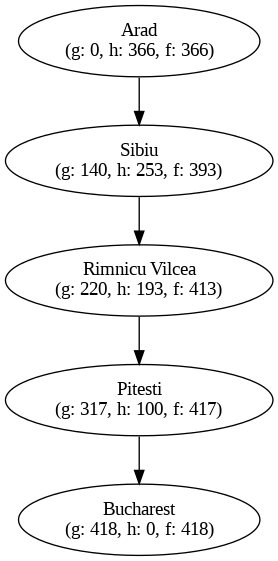

In [ ]:
no_inicial = No('Arad', 0, None, None)
problema_romenia = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Bucharest')

busca = BuscaAEstrela(problema_romenia, heuristica_romenia)
busca.executar()

if busca.situacao == BUSCA_SUCESSO:
    dot = desenhar_arvore(busca.solucao, heuristica_romenia)
    dot.render('arvore_a_estrela_romenia', format='png', cleanup=True)
    display(Image(filename='arvore_a_estrela_romenia.png'))

Questão 3


🔁 Passo 0
🌍 Expandindo: Drobeta (g: 0, h: 242, f: 242)
📌 Fronteira atual: [('Craiova', 280), ('Mehadia', 316)]

🔁 Passo 1
🌍 Expandindo: Craiova (g: 120, h: 160, f: 280)
📌 Fronteira atual: [('Mehadia', 316), ('Rimnicu Vilcea', 459), ('Pitesti', 358)]

🔁 Passo 2
🌍 Expandindo: Mehadia (g: 75, h: 241, f: 316)
📌 Fronteira atual: [('Pitesti', 358), ('Rimnicu Vilcea', 459), ('Lugoj', 389)]

🔁 Passo 3
🌍 Expandindo: Pitesti (g: 258, h: 100, f: 358)
📌 Fronteira atual: [('Bucharest', 359), ('Lugoj', 389), ('Rimnicu Vilcea', 548), ('Rimnicu Vilcea', 459)]

🔁 Passo 4
🌍 Expandindo: Bucharest (g: 359, h: 0, f: 359)

✅ Solução encontrada!
→ Drobeta (g: 0, h: 242, f: 242)
→ Craiova (g: 120, h: 160, f: 280)
→ Pitesti (g: 258, h: 100, f: 358)
→ Bucharest (g: 359, h: 0, f: 359)


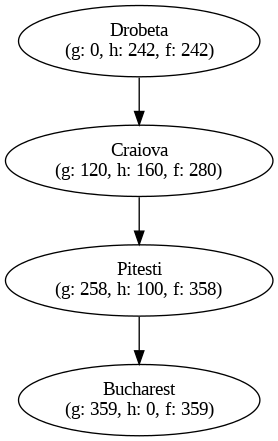

In [ ]:
no_inicial = No('Drobeta', 0, None, None)
problema_romenia = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Bucharest')

busca = BuscaAEstrela(problema_romenia, heuristica_romenia)
busca.executar()

if busca.situacao == BUSCA_SUCESSO:
    dot = desenhar_arvore(busca.solucao, heuristica_romenia)
    dot.render('arvore_a_estrela_romenia', format='png', cleanup=True)
    display(Image(filename='arvore_a_estrela_romenia.png'))


🔁 Passo 0
🌍 Expandindo: Eforie (g: 0, h: 161, f: 161)
📌 Fronteira atual: [('Hirsova', 237)]

🔁 Passo 1
🌍 Expandindo: Hirsova (g: 86, h: 151, f: 237)
📌 Fronteira atual: [('Urziceni', 264)]

🔁 Passo 2
🌍 Expandindo: Urziceni (g: 184, h: 80, f: 264)
📌 Fronteira atual: [('Bucharest', 269), ('Vaslui', 525)]

🔁 Passo 3
🌍 Expandindo: Bucharest (g: 269, h: 0, f: 269)

✅ Solução encontrada!
→ Eforie (g: 0, h: 161, f: 161)
→ Hirsova (g: 86, h: 151, f: 237)
→ Urziceni (g: 184, h: 80, f: 264)
→ Bucharest (g: 269, h: 0, f: 269)


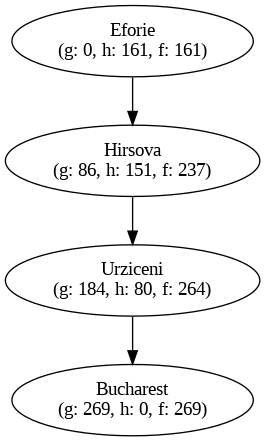

In [ ]:
no_inicial = No('Eforie', 0, None, None)
problema_romenia = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Bucharest')

busca = BuscaAEstrela(problema_romenia, heuristica_romenia)
busca.executar()

if busca.situacao == BUSCA_SUCESSO:
    dot = desenhar_arvore(busca.solucao, heuristica_romenia)
    dot.render('arvore_a_estrela_romenia', format='png', cleanup=True)
    display(Image(filename='arvore_a_estrela_romenia.png'))

Questão 4


🔁 Passo 0
🌍 Expandindo: Arad (g: 0, h: 476, f: 476)
📌 Fronteira atual: [('Sibiu', 500), ('Zerind', 525), ('Timisoara', 618)]

🔁 Passo 1
🌍 Expandindo: Sibiu (g: 140, h: 360, f: 500)
📌 Fronteira atual: [('Zerind', 525), ('Fagaras', 559), ('Oradea', 697), ('Timisoara', 618), ('Rimnicu Vilcea', 600)]

🔁 Passo 2
🌍 Expandindo: Zerind (g: 75, h: 450, f: 525)
📌 Fronteira atual: [('Oradea', 552), ('Fagaras', 559), ('Oradea', 697), ('Timisoara', 618), ('Rimnicu Vilcea', 600)]

🔁 Passo 3
🌍 Expandindo: Oradea (g: 146, h: 406, f: 552)
📌 Fronteira atual: [('Fagaras', 559), ('Rimnicu Vilcea', 600), ('Oradea', 697), ('Timisoara', 618)]

🔁 Passo 4
🌍 Expandindo: Fagaras (g: 239, h: 320, f: 559)
📌 Fronteira atual: [('Rimnicu Vilcea', 600), ('Timisoara', 618), ('Oradea', 697), ('Bucharest', 836)]

🔁 Passo 5
🌍 Expandindo: Rimnicu Vilcea (g: 220, h: 380, f: 600)
📌 Fronteira atual: [('Timisoara', 618), ('Pitesti', 667), ('Oradea', 697), ('Bucharest', 836), ('Craiova', 818)]

🔁 Passo 6
🌍 Expandindo: Timisoar

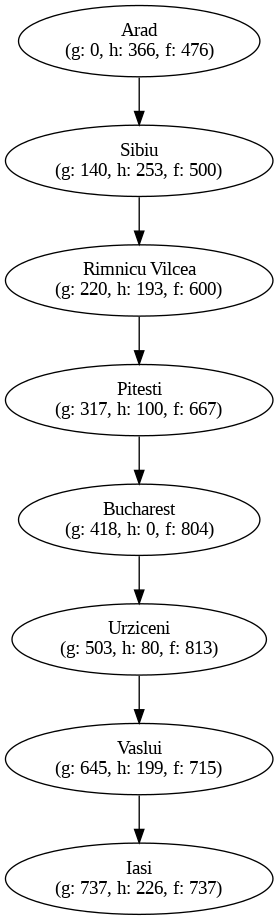

In [ ]:
heuristica_iasi = {
    "Arad": 476,
    "Bucharest": 386,
    "Craiova": 452,
    "Drobeta": 509,
    "Eforie": 448,
    "Fagaras": 320,
    "Giurgiu": 400,
    "Hirsova": 345,
    "Iasi": 0,
    "Lugoj": 444,
    "Mehadia": 470,
    "Neamt": 118,
    "Oradea": 406,
    "Pitesti": 350,
    "Rimnicu Vilcea": 380,
    "Sibiu": 360,
    "Timisoara": 500,
    "Urziceni": 310,
    "Vaslui": 70,
    "Zerind": 450
}

no_inicial = No('Arad', 0, None, None)
problema_romenia = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Iasi')
busca = BuscaAEstrela(problema_romenia, heuristica_iasi)
busca.executar()


if busca.situacao == BUSCA_SUCESSO:
    dot = desenhar_arvore(busca.solucao, heuristica_romenia)
    dot.render('arvore_a_estrela_romenia', format='png', cleanup=True)
    display(Image(filename='arvore_a_estrela_romenia.png'))

Questão 5

In [ ]:
import heapq

# 1=obstáculo
maze = [
    [0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (7, 7)

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), 0, start, [start]))
    visited = set()
    step = 0

    while open_set:
        print(f"\nPasso {step}:")
        print("Open set (fila de prioridade):")
        for item in open_set:
            print(f"  -> {item}")
        step += 1

        _, cost, current, path = heapq.heappop(open_set)

        print(f"\nExplorando nó: {current}")
        print(f"Caminho até agora: {path}")

        if current == goal:
            print("\nDestino alcançado!")
            return path

        if current in visited:
            print(f"{current} já foi visitado, pulando.")
            continue
        visited.add(current)

        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            x, y = current[0] + dx, current[1] + dy
            if 0 <= x < rows and 0 <= y < cols and maze[x][y] == 0:
                next_node = (x, y)
                if next_node not in visited:
                    new_cost = cost + 1
                    priority = new_cost + heuristic(next_node, goal)
                    heapq.heappush(open_set, (priority, new_cost, next_node, path + [next_node]))
    print("Nenhum caminho encontrado.")
    return None

def print_maze_with_path(maze, path):
    maze_copy = [row[:] for row in maze]
    for x, y in path:
        maze_copy[x][y] = '*'
    for row in maze_copy:
        print(' '.join(str(cell) if cell != '*' else '*' for cell in row))

path = a_star(maze, start, goal)

if path:
    print("\nCaminho encontrado:")
    for step in path:
        print(step)
    print("\nLabirinto com o caminho marcado:")
    print_maze_with_path(maze, path)
else:
    print("Nenhum caminho encontrado.")



Passo 0:
Open set (fila de prioridade):
  -> (14, 0, (0, 0), [(0, 0)])

Explorando nó: (0, 0)
Caminho até agora: [(0, 0)]

Passo 1:
Open set (fila de prioridade):
  -> (14, 1, (1, 0), [(0, 0), (1, 0)])

Explorando nó: (1, 0)
Caminho até agora: [(0, 0), (1, 0)]

Passo 2:
Open set (fila de prioridade):
  -> (14, 2, (2, 0), [(0, 0), (1, 0), (2, 0)])

Explorando nó: (2, 0)
Caminho até agora: [(0, 0), (1, 0), (2, 0)]

Passo 3:
Open set (fila de prioridade):
  -> (14, 3, (2, 1), [(0, 0), (1, 0), (2, 0), (2, 1)])

Explorando nó: (2, 1)
Caminho até agora: [(0, 0), (1, 0), (2, 0), (2, 1)]

Passo 4:
Open set (fila de prioridade):
  -> (14, 4, (2, 2), [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)])

Explorando nó: (2, 2)
Caminho até agora: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]

Passo 5:
Open set (fila de prioridade):
  -> (16, 5, (1, 2), [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2)])

Explorando nó: (1, 2)
Caminho até agora: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2)]

Passo 6:
Open set (fi